In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
carstocks = pd.read_csv('data/car_stocks.csv', low_memory=False)
carstocks.head(1)

,Symbol,Date,Open,High,Low,Close,Adj Close,Volume
0,RIVN,2021-11-10,106.75,119.459999,95.199997,100.730003,100.730003,103679500


In [3]:
carstocks['Close'].mean()
# 모든 자동차 종가의 평균 값

79.83897420512821

In [4]:
carstocks.groupby('Symbol')['Open'].mean()
# 자동차 회사들의 오픈 평균 값

Symbol
GM       61.937693
LCID     48.761538
RIVN    127.710000
Name: Open, dtype: float64

In [5]:
carstocks.groupby('Symbol')['High'].max()
# 자동차 회사들의 최고 값

Symbol
GM       65.180000
LCID     57.750000
RIVN    179.470001
Name: High, dtype: float64

In [6]:
carstocks[carstocks['Symbol']=='RIVN']['Close'].mean()
carstocks[carstocks['Symbol']=='LCID']['Close'].mean()
carstocks[carstocks['Symbol']=='GM']['Close'].mean()

62.16461546153845

In [7]:
titanic = pd.read_csv('data/titanic.csv', low_memory=False)
titanic.head(1)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"


In [51]:
df = titanic[['pclass','survived','sex','age']]
df.head()

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000


In [14]:
gbo = df.groupby(by='sex')
gbo.min()

,pclass,survived,age
sex,,,
female,1,0,0.1667
male,1,0,0.3333


In [16]:
gbo.get_group('male')

,pclass,survived,sex,age
1,1,1,male,0.9167
3,1,0,male,30
5,1,1,male,48
7,1,0,male,39
9,1,0,male,71
...,...,...,...,...
1302,3,0,male,?
1303,3,0,male,?
1306,3,0,male,26.5
1307,3,0,male,27


In [25]:
titanic['age'] = titanic['age'].replace(['?'],[None]).astype('float')
titanic.groupby('pclass')['age'].mean()
# 타이타닉의 age 컬럼 안에 있는 "?"을 None, 즉 데이터 없음으로 하고, float 형의
# 데어터 타입으로 바꿔줌.

pclass
1    39.159918
2    29.506705
3    24.816367
Name: age, dtype: float64

In [24]:
titanic.groupby('sex')['survived'].mean()

sex
female    0.727468
male      0.190985
Name: survived, dtype: float64

In [31]:
titanic.groupby('sex')['age'].agg(['min','max','mean','median'])
# median은 중간 값

,min,max,mean,median
sex,,,,
female,0.1667,76.0,28.687071,27.0
male,0.3333,80.0,30.585233,28.0


In [39]:
carstocks.groupby('Symbol').agg({'Open':'mean','Close':'mean','Volume':['mean','sum']})

Open       Close        Volume            
              mean        mean          mean         sum
Symbol                                                  
GM       61.937693   62.164615  2.025259e+07   263283700
LCID     48.761538   49.829231  1.081098e+08  1405427200
RIVN    127.710000  127.523077  5.252395e+07   682811400

In [50]:
def range(a):
    return a.max()-a.min()
titanic.groupby('pclass')['age'].agg({'min','max',range})

,range,max,min
pclass,,,
1,79.0833,80.0,0.9167
2,69.3333,70.0,0.6667
3,73.8333,74.0,0.1667


In [58]:
titanic['age'] = titanic['age'].replace(['?'],[None]).astype('float')
titanic.groupby(['sex','pclass','survived'])['age'].mean()

sex     pclass  survived
female  1       0           35.200000
                1           37.109375
        2       0           34.090909
                1           26.711051
        3       0           23.418750
                1           20.814815
male    1       0           43.658163
                1           36.168240
        2       0           33.092593
                1           17.449274
        3       0           26.679598
                1           22.436441
Name: age, dtype: float64

In [67]:
titanic.groupby('pclass')['age'].size()-titanic.groupby('pclass')['age'].count()

pclass
1     39
2     16
3    208
Name: age, dtype: int64

In [118]:
def fff(j):
    return j.size-j.count()
titanic.groupby('pclass')['age'].agg(fff)

pclass
1     39
2     16
3    208
Name: age, dtype: int64

In [81]:
df = titanic[['pclass','survived','sex','age']]
df.groupby('sex').mean()

,pclass,survived,age
sex,,,
female,2.154506,0.727468,28.687071
male,2.372479,0.190985,30.585233


In [80]:
df[df['survived']==1]['age'].mean()

28.918228103044495

In [86]:
df[df['sex']=='male'].mean()

C:\Users\yangm\AppData\Local\Temp\ipykernel_6776\2404448511.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[df['sex']=='male'].mean()


pclass       2.372479
survived     0.190985
age         30.585233
dtype: float64

In [92]:
gbo=df.groupby(by='sex')
gbo.get_group('male')

,pclass,survived,sex,age
1,1,1,male,0.9167
3,1,0,male,30.0000
5,1,1,male,48.0000
7,1,0,male,39.0000
9,1,0,male,71.0000
...,...,...,...,...
1302,3,0,male,NaN
1303,3,0,male,NaN
1306,3,0,male,26.5000
1307,3,0,male,27.0000


In [100]:
for i in gbo:
    print(i[0])
    print('---------')
    print(i[1])

female
---------
      pclass  survived     sex   age
0          1         1  female  29.0
2          1         0  female   2.0
4          1         0  female  25.0
6          1         1  female  63.0
8          1         1  female  53.0
...      ...       ...     ...   ...
1286       3         1  female  38.0
1290       3         1  female  47.0
1300       3         1  female  15.0
1304       3         0  female  14.5
1305       3         0  female   NaN

[466 rows x 4 columns]
male
---------
      pclass  survived   sex      age
1          1         1  male   0.9167
3          1         0  male  30.0000
5          1         1  male  48.0000
7          1         0  male  39.0000
9          1         0  male  71.0000
...      ...       ...   ...      ...
1302       3         0  male      NaN
1303       3         0  male      NaN
1306       3         0  male  26.5000
1307       3         0  male  27.0000
1308       3         0  male  29.0000

[843 rows x 4 columns]


In [102]:
for i, t in gbo:
    print(i)
    print('----------')
    print(t)

female
----------
      pclass  survived     sex   age
0          1         1  female  29.0
2          1         0  female   2.0
4          1         0  female  25.0
6          1         1  female  63.0
8          1         1  female  53.0
...      ...       ...     ...   ...
1286       3         1  female  38.0
1290       3         1  female  47.0
1300       3         1  female  15.0
1304       3         0  female  14.5
1305       3         0  female   NaN

[466 rows x 4 columns]
male
----------
      pclass  survived   sex      age
1          1         1  male   0.9167
3          1         0  male  30.0000
5          1         1  male  48.0000
7          1         0  male  39.0000
9          1         0  male  71.0000
...      ...       ...   ...      ...
1302       3         0  male      NaN
1303       3         0  male      NaN
1306       3         0  male  26.5000
1307       3         0  male  27.0000
1308       3         0  male  29.0000

[843 rows x 4 columns]


In [106]:
gbo = df.groupby(by='sex')
gbo['age'].mean()

sex
female    28.687071
male      30.585233
Name: age, dtype: float64

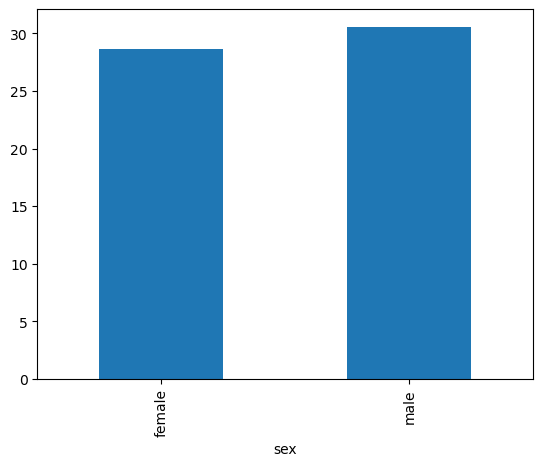

In [111]:
gbo['age'].mean().plot(kind='bar')
plt.show()

In [113]:
carstocks.groupby('Symbol').agg({'Open':'mean','Close':'mean','Volume':['mean','sum']})
# sum은 총합

Open       Close        Volume            
              mean        mean          mean         sum
Symbol                                                  
GM       61.937693   62.164615  2.025259e+07   263283700
LCID     48.761538   49.829231  1.081098e+08  1405427200
RIVN    127.710000  127.523077  5.252395e+07   682811400

In [124]:
titanic[titanic['pclass']==1]['age'].size-titanic[titanic['pclass']==1]['age'].count()

39

In [140]:
carstocks.groupby('Symbol').agg(min_open=('Open','min'),max_open=('Open','max'),min_close=('Close','min'),max_close=('Close','max'))

,min_open,max_open,min_close,max_close
Symbol,,,,
GM,57.849998,64.330002,59.270000,64.610001
LCID,42.299999,56.200001,40.750000,55.520000
RIVN,106.750000,163.800003,100.730003,172.009995
